# Assignment: Report on Individuals' Responses in Rural NZ

---

## 1.Introduction
The focus of this report is to look at individuals' lifestyles in rural NZ, as well as their living conditions. The report is also about individuals' attitudes towards different products. As we all know, People in different lifestyles prefer different features of one product. There are so many columns in the dataset so we will only pick some necessary ones, such as attitudes, interests. We will use some graphs to represent the outcomes.

## 2.Software Environment

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pylab import rcParams
%matplotlib inline


In [2]:
rcParams['figure.figsize'] = 15,10
rcParams['font.size'] = 30
pd.set_option('max_columns',0)

## 3.Data Importing

In [3]:
rural_data = pd.read_csv('RURAL_LS_SAMPLE.csv')
rural_data.head()

E:\Program Files\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2902: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,INT_M_PUB,INT_M_CINEMA,INT_M_THEATRE,INT_M_GYM,INT_M_ENTERTAIN,INT_M_EATOUT,INT_M_WINE,INT_M_CGAME,INT_M_MUSIC,INT_M_COOK,INT_M_READ,INT_M_GARDEN,INT_M_COMPET,INT_M_SEW,INT_M_CAR,INT_M_CLOTHESSHOP,OCCUPATION_MYSELF_MANAGER,OCC_P_MGR,OCC_M_PROF,OCC_P_PROF,OCC_M_SALES,OCC_P_SALES,OCC_M_ADMIN,OCC_P_ADMIN,OCC_M_COMM,OCC_P_COMM,OCC_M_TRADE,OCC_P_TRADE,OCC_M_SEMP,OCC_P_SEMP,OCC_M_LABOUR,OCC_P_LABOUR,OCC_M_MACH,OCC_P_MACH,OCC_M_HMD,OCC_P_HMD,OCC_M_RETIRE,OCC_P_RETIRE,OCC_M_STUD,...,MAILING_LIST_OPT_OUT_IND,GENDER_F_ONLY,GENDER_M_ONLY,GENDER_F_INCLUDED,GENDER_M_INCLUDED,GENDER_BOTH,GENDER_UNKNOWN,ANIMAL_CARE,ARTS_CRAFTS,BOOKS,CLOTHING,COMPUTERS_TECHNOLOGY,EDUCATION_BY_CORRESPONDENCE,FINANCIAL_SERVICES,FOOD_WINE,FURNISHING_HOMEWARE_RENOVATION,GARDENING,GENERAL_CATALOGUES,GOLF,HEALTH_FITNESS,HORSES,HUNTING_FISHING,INVESTMENT_OPPORTUNITIES,MUSIC,OTHER_SPORTS,TRAVEL,VEHICLES,AGRICULTURAL_SERVICES,BEEF,CROPPING_ARABLE,DAIRY,HORTICULTURE,OTHER_LIVESTOCK,RETIRED,SHEEP,SMALL_LIFESTYLE_FARMER,TOURISM,OTHER_BUSINESS,OTHER_RESIDENTIAL,OTHER_FARMER
0,1,NaN,1,1,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,...,N,NaN,Y,NaN,Y,NaN,NaN,N,N,Y,N,N,N,N,N,Y,Y,N,N,N,N,Y,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,Y,N
1,2,NaN,1,NaN,NaN,NaN,1,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,...,N,NaN,Y,NaN,Y,NaN,NaN,N,N,N,N,Y,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N
2,3,NaN,1,1,NaN,1,1,NaN,NaN,NaN,1,1,1,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,...,Y,Y,NaN,Y,NaN,NaN,NaN,N,N,N,N,N,N,N,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N
3,4,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,...,N,Y,NaN,Y,NaN,NaN,NaN,Y,Y,Y,N,N,N,N,N,Y,Y,N,N,N,N,Y,N,N,N,N,N,N,Y,N,N,N,N,N,Y,N,N,N,N,N
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1,NaN,NaN,NaN,...,N,Y,NaN,Y,NaN,NaN,NaN,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N


Based on my assumption, these columns can be divided like this:

1.Column beginning with 'INT':indicate an individuals' interests in lifestyle,the answer is 'True' or 'False';

2.Column beginning with 'OCC':indicate an individuals' occupation,the answer is also 'True' or 'False';

3.Column beginning with 'ATT':indicate an individuals' attitude on different things,the answer is also 'True' or 'False'.


We will look at the datas from 3 angles:

1.Individuals interests and occupations.

2.Individuals attitudes.

3.Indisiduals living conditions.

## 4.Data Wrangling,EDA and Analysis

Fill 'NaN' with 0.

In [4]:
rural_data=rural_data.fillna(0)

### 4.1 Individuals interests and occupations

In [5]:
interests_data=rural_data.ix[:,1:17]
interests_data

,INT_M_PUB,INT_M_CINEMA,INT_M_THEATRE,INT_M_GYM,INT_M_ENTERTAIN,INT_M_EATOUT,INT_M_WINE,INT_M_CGAME,INT_M_MUSIC,INT_M_COOK,INT_M_READ,INT_M_GARDEN,INT_M_COMPET,INT_M_SEW,INT_M_CAR,INT_M_CLOTHESSHOP
0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0
1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0
2,0,1,1,0,1,1,0,0,0,1,1,1,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0
5,1,0,1,1,1,1,1,1,1,0,0,0,1,0,0,1
6,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1
8,0,0,0,0,0,1,0,1,1,1,0,1,1,0,0,1
9,0,1,1,1,1,1,1,0,1,1,1,0,0,0,0,1


We are interested in which activities are popular and which ones are not.

E:\Program Files\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


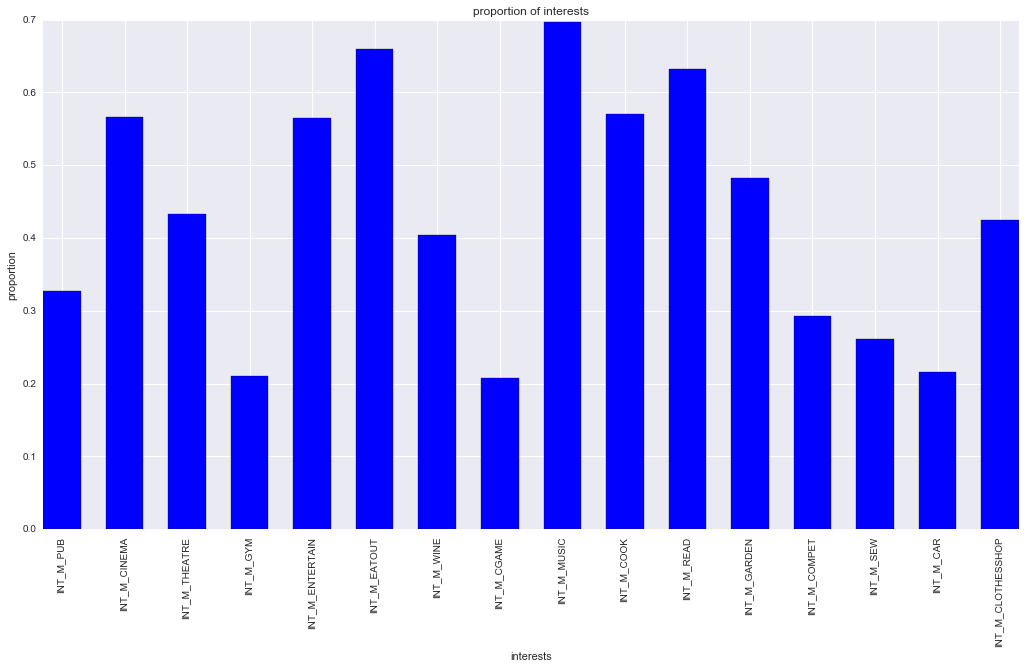

In [6]:
#(interests_data.mean()).plot.bar()
index=np.arange(len(interests_data.columns))
bar_width = 0.60
plt.xlabel('interests')
plt.ylabel('proportion')
plt.xticks(index+bar_width/2, interests_data.columns,rotation='vertical')
plt.title('proportion of interests')
plt.legend()
plt.tight_layout()

rects1=plt.bar(index, interests_data.mean(), bar_width,color='b')

It shows that listening music and eatout are the top two popular activities. However, computer game is the least popular activity, which surprises me.

We can also see the proportion of different occupations.

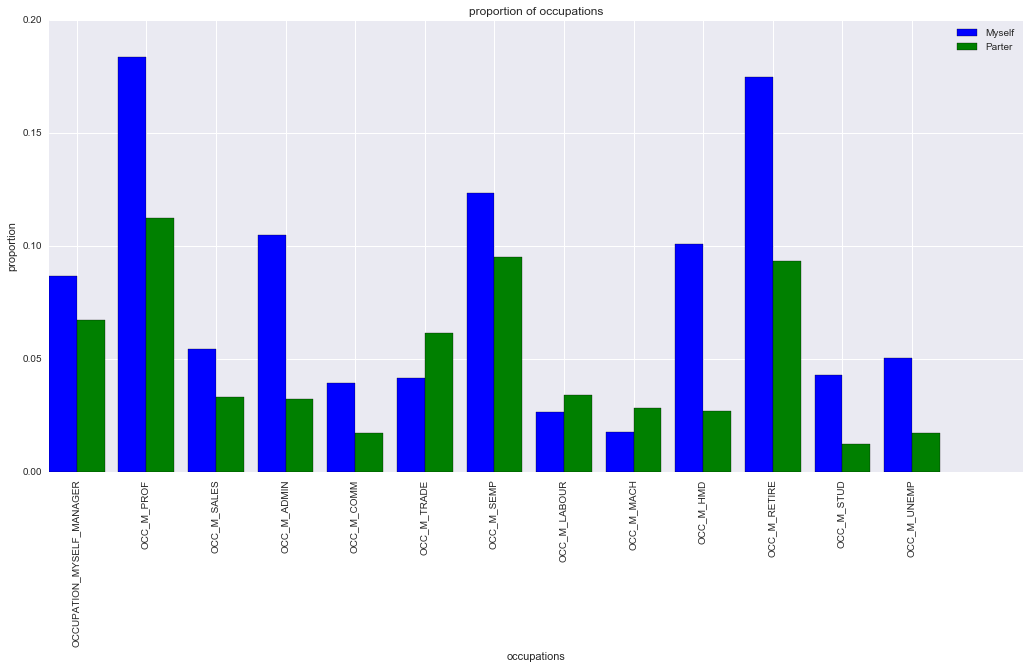

In [7]:
occupations_data=rural_data.ix[:,'OCCUPATION_MYSELF_MANAGER':'OCC_P_UNEMP']
occupations_m_data=occupations_data[[c for c in occupations_data.columns if c.find('_M_')!=-1 or c.find('_MYSELF_')!=-1]]
occupations_p_data=occupations_data[[c for c in occupations_data.columns if c.find('_P_')!=-1]]

#help('matplotlib.pyplot.figure')
plt.figure(num=None,  dpi=80, facecolor='w', edgecolor='k')
index=np.arange(len(occupations_m_data.columns))
bar_width = 0.40


rects1=plt.bar(index, occupations_m_data.mean(), bar_width,color='b',label='Myself')
rects2=plt.bar(index + bar_width, occupations_p_data.mean(), bar_width,color='g',label='Parter') 

plt.xlabel('occupations')
plt.ylabel('proportion')
plt.xticks(index + bar_width, occupations_m_data.columns,rotation='vertical')
plt.title('proportion of occupations')
plt.legend()
plt.tight_layout()


The largest two parts of these occupations are professor and retired, nearly 20 percent.

### 4.2 Individuals attitudes.


Individuals' attitudes can reflect their life styles and conditions. It is important to analysis them. However, in this dataset, the attitudes are seperated to fragmentations, five attitudes to one target are in different columns. We need to integrate them.

In [8]:
attitudes_data=rural_data.ix[:,'ATT_Buy_NZ_productas_Strongly agree':'ATT_VOTEELEC_SD']
attitudes_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65000 entries, 0 to 64999
Data columns (total 70 columns):
ATT_Buy_NZ_productas_Strongly agree        65000 non-null float64
ATT_Buy_NZ_productas_agree                 65000 non-null float64
ATT_Buy_NZ_productas_no opinion            65000 non-null float64
ATT_NZPROD_Disagree                        65000 non-null float64
ATT_NZPROD_StronglyDisagree                65000 non-null float64
ATT_ENVIRONMENTALLY_friendly_product_SA    65000 non-null float64
ATT_ENVIRON_A                              65000 non-null float64
ATT_ENVIRON_NO                             65000 non-null float64
ATT_ENVIRON_D                              65000 non-null float64
ATT_ENVIRON_SD                             65000 non-null float64
ATT_QUALITY_SA                             65000 non-null float64
ATT_QUALITY_A                              65000 non-null float64
ATT_QUALITY_NO                             65000 non-null float64
ATT_QUALITY_D                    

The attitudes can be set at 5 levels. firstly, I wanted to set 5 to 'SA', 4 to 'A'.... However, I found that some people even didn't make a choice, so their levels would only be 0, the level is lower than 'Strongly Disagree'. It seems that they should be set on the level which is same on 'No Answer'. So I changed the level, 2 to 'SA', 1 to 'A',0 to 'No Answer', -1 to 'Disagree', -2 to 'Strongly Disagree'.

Set levels:

In [9]:
cols_sa=[c for c in attitudes_data.columns if (c.lower()[-2:]=='sa' or c.lower()[-14:]=='strongly agree')]
cols_a=[c for c in attitudes_data.columns if (c.lower()[-2:]=='_a' or c.lower()[-6:]=='_agree')]
cols_no=[c for c in attitudes_data.columns if (c.lower()[-3:]=='_no' or c.lower()[-11:]=='_no opinion')]
cols_d=[c for c in attitudes_data.columns if (c.lower()[-9:]=='_disagree' or c.lower()[-2:]=='_d')]
cols_sd=[c for c in attitudes_data.columns if (c.lower()[-17:]=='_stronglydisagree' or c.lower()[-3:]=='_sd')]
attitudes_data[cols_sa]=attitudes_data[cols_sa].replace(1,2)
attitudes_data[cols_a]=attitudes_data[cols_a].replace(1,1)
attitudes_data[cols_no]=attitudes_data[cols_no].replace(1,0)
attitudes_data[cols_d]=attitudes_data[cols_d].replace(1,-1)
attitudes_data[cols_sd]=attitudes_data[cols_sd].replace(1,-2)
attitudes_data.head()

,ATT_Buy_NZ_productas_Strongly agree,ATT_Buy_NZ_productas_agree,ATT_Buy_NZ_productas_no opinion,ATT_NZPROD_Disagree,ATT_NZPROD_StronglyDisagree,ATT_ENVIRONMENTALLY_friendly_product_SA,ATT_ENVIRON_A,ATT_ENVIRON_NO,ATT_ENVIRON_D,ATT_ENVIRON_SD,ATT_QUALITY_SA,ATT_QUALITY_A,ATT_QUALITY_NO,ATT_QUALITY_D,ATT_QUALITY_SD,ATT_TECHIMP_SA,ATT_TECHIMP_A,ATT_TECHIMP_NO,ATT_TECHIMP_D,ATT_TECHIMP_SD,ATT_FINCTL_SA,ATT_FINCTL_A,ATT_FINCTL_NO,ATT_FINCTL_D,ATT_FINCTL_SD,ATT_WKBILLS_SA,ATT_WKBILLS_A,ATT_WKBILLS_NO,ATT_WKBILLS_D,ATT_WKBILLS_SD,ATT_FINSEC_SA,ATT_FINSEC_A,ATT_FINSEC_NO,ATT_FINSEC_D,ATT_FINSEC_SD,ATT_INVRISK_SA,ATT_INVRISK_A,ATT_INVRISK_NO,ATT_INVRISK_D,ATT_INVRISK_SD,ATT_HMIDEA_SA,ATT_HMIDEA_A,ATT_HMIDEA_NO,ATT_HMIDEA_D,ATT_HMIDEA_SD,ATT_SPEC_SA,ATT_SPEC_A,ATT_SPEC_NO,ATT_SPEC_D,ATT_SPEC_SD,ATT_LOWFAT_SA,ATT_LOWFAT_A,ATT_LOWFAT_NO,ATT_LOWFAT_D,ATT_LOWFAT_SD,ATT_HEALTHY_SA,ATT_HEALTHY_A,ATT_HEALTHY_NO,ATT_HEALTHY_D,ATT_HEALTHY_SD,ATT_FASHION_SA,ATT_FASHION_A,ATT_FASHION_NO,ATT_FASHION_D,ATT_FASHION_SD,ATT_VOTE ON LOCAL ISSUES_SA,ATT_VOTEELEC_A,ATT_VOTEELEC_NO,ATT_VOTEELEC_D,ATT_VOTEELEC_SD
0,2,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,-1,0,2,0,0,0,0,0,0,0,-1,0,2,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,-1,0,0,0,0,-1,0,0,0,0,-1,0,0,0,0,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,2,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,2,0,0,0,0,2,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


Generate a list which contains standard names.

In [10]:
attitudes_data=attitudes_data.rename(columns = {'ATT_Buy_NZ_productas_Strongly agree':'ATT_NZPROD_Strongly agree',
                                                'ATT_ENVIRONMENTALLY_friendly_product_SA':'ATT_ENVIRON_SA',
                                                'ATT_VOTE ON LOCAL ISSUES_SA':'ATT_VOTEELEC_SA',
                                                'ATT_Buy_NZ_productas_Strongly agree':'ATT_NZPROD_SA',
                                                'ATT_Buy_NZ_productas_agree':'ATT_NZPROD_A',
                                                'ATT_Buy_NZ_productas_no opinion':'ATT_NZPROD_NO'})
attitudes_columns=[]
for c in attitudes_data.columns:
    attitudes_columns.append(c[:c.rfind('_')])
    
set(attitudes_columns)

{'ATT_ENVIRON',
 'ATT_FASHION',
 'ATT_FINCTL',
 'ATT_FINSEC',
 'ATT_HEALTHY',
 'ATT_HMIDEA',
 'ATT_INVRISK',
 'ATT_LOWFAT',
 'ATT_NZPROD',
 'ATT_QUALITY',
 'ATT_SPEC',
 'ATT_TECHIMP',
 'ATT_VOTEELEC',
 'ATT_WKBILLS'}

A function to integrate different attitudes.

In [11]:
def get_level(list):
    level=0
    for i in list:
        if i!= 0:
            level=i
    return level

In [12]:
#list for standard names.
attitudes_columns=set(attitudes_columns)

for c in attitudes_columns:
    attitudes=[]
    
    #find attitudes on the same target.
    for ca in attitudes_data.columns:
        if ca.find(c)!=-1:
            attitudes.append(ca)
     
    #integrate columns to the new standard column
    if len(attitudes)>1:
        attitudes_data[c]=attitudes_data[attitudes].apply(get_level, axis=1)
        #drop used columns
        attitudes_data=attitudes_data.drop(attitudes,axis=1)

attitudes_data

,ATT_VOTEELEC,ATT_SPEC,ATT_WKBILLS,ATT_FINSEC,ATT_FASHION,ATT_LOWFAT,ATT_HEALTHY,ATT_HMIDEA,ATT_INVRISK,ATT_ENVIRON,ATT_TECHIMP,ATT_FINCTL,ATT_NZPROD,ATT_QUALITY
0,1,1,-1,2,0,0,0,0,-1,1,-1,2,2,2
1,1,-1,-1,-1,0,1,0,0,1,1,-1,-1,1,1
2,1,1,0,1,0,1,1,0,1,0,0,1,1,1
3,2,0,0,0,0,0,0,0,0,0,0,0,2,2
4,1,1,2,2,0,0,1,1,2,0,1,1,1,0
5,-1,2,2,-1,0,0,0,0,0,0,0,0,1,2
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,1,-1,1,-2,0,0,-2,-1,1,-2,1,1,-1
8,1,2,-2,-1,0,0,0,0,-2,1,0,1,2,2
9,0,1,0,2,0,1,1,0,0,0,0,2,0,1


The progress is quite slow, please wait.

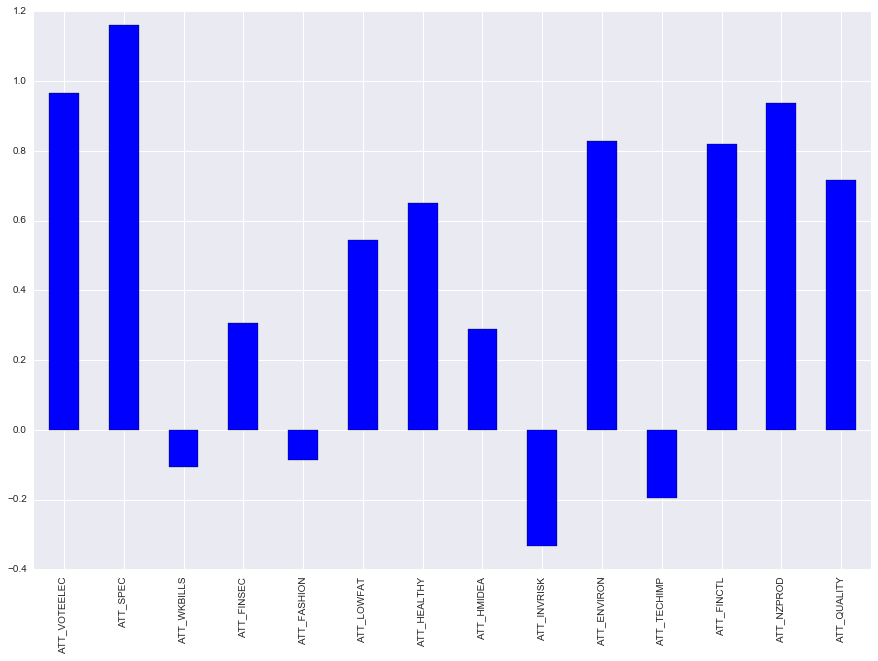

In [13]:
_=(attitudes_data.mean()).plot(kind='bar')

The result is simple but significant. The points which are positive mean people are agree with this target. The more points a target gets, the more agreement people have on this target. It seems that most of these features are agreed.

### 4.3 Individuals living conditions.

We will choose some columns to analysis individuals' living conditions.

In [14]:
living_data=rural_data[['CAR count','HMOWN','HMVALUE','PEOPLE','supermarket spend in a week','CONTRACT_START_DATE']]
living_data

,CAR count,HMOWN,HMVALUE,PEOPLE,supermarket spend in a week,CONTRACT_START_DATE
0,d. 3+ Cars,a. Own with a mortgage,b. $200k to $400k,e. 5 People,c. $200 to $300,2014/4/8 0:00
1,b. 1 Car,a. Own with a mortgage,c. $400k to $600k,d. 4 People,d. $300 to $400,1992/7/11 0:00
2,b. 1 Car,b. Own without a mortgage,b. $200k to $400k,b. Two People,b. $100 to $200,2012/2/1 0:00
3,b. 1 Car,b. Own without a mortgage,b. $200k to $400k,a. One Person,b. $100 to $200,2005/11/14 9:43
4,b. 1 Car,a. Own with a mortgage,b. $200k to $400k,b. Two People,b. $100 to $200,1998/2/27 0:00
5,b. 1 Car,c. Rent,f. Don't know,d. 4 People,b. $100 to $200,2014/7/11 0:00
6,e. No Answer,e. No Answer,g. No Answer,h. No Answer,g. No Answer,2005/5/6 14:37
7,a. 0 Cars,c. Rent,d. $800k to $1m,g. 7+ People,a. Up to $100,2013/12/6 0:00
8,b. 1 Car,c. Rent,g. No Answer,b. Two People,a. Up to $100,2008/4/18 0:00
9,c. 2 Cars,a. Own with a mortgage,c. $400k to $600k,c. 3 People,b. $100 to $200,2013/3/18 9:08


In [15]:
living_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65000 entries, 0 to 64999
Data columns (total 6 columns):
CAR count                      65000 non-null object
HMOWN                          65000 non-null object
HMVALUE                        65000 non-null object
PEOPLE                         65000 non-null object
supermarket spend in a week    65000 non-null object
CONTRACT_START_DATE            65000 non-null object
dtypes: object(6)
memory usage: 3.5+ MB


We will modify the type of 'CONTRACT_START_DATE' column from 'object' to 'date'

In [16]:
living_data['CONTRACT_START_DATE']=pd.to_datetime(living_data['CONTRACT_START_DATE'], format='%Y/%m/%d %M:%S')
living_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65000 entries, 0 to 64999
Data columns (total 6 columns):
CAR count                      65000 non-null object
HMOWN                          65000 non-null object
HMVALUE                        65000 non-null object
PEOPLE                         65000 non-null object
supermarket spend in a week    65000 non-null object
CONTRACT_START_DATE            65000 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 3.5+ MB


E:\Program Files\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Set date index.

In [17]:
living_data=living_data.set_index(['CONTRACT_START_DATE'])

We can see a line chart of the contracts per year.

,CAR count
1955,1
1969,1
1979,1
1982,1
1983,1
1990,17
1991,7
1992,5203
1993,525
1994,464


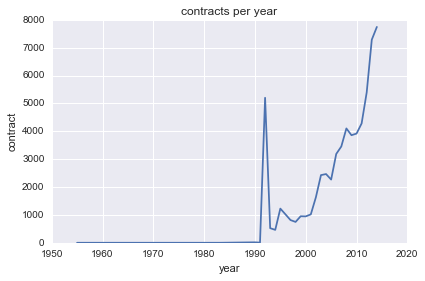

In [26]:
contract_data=living_data[[0]].groupby(living_data.index.year).count()

plt.plot(contract_data)

plt.xlabel('year')
plt.ylabel('contract')
plt.title('contracts per year')
plt.legend()
plt.tight_layout()
contract_data

We can change the begin of the year to make the chart more clearly to see.

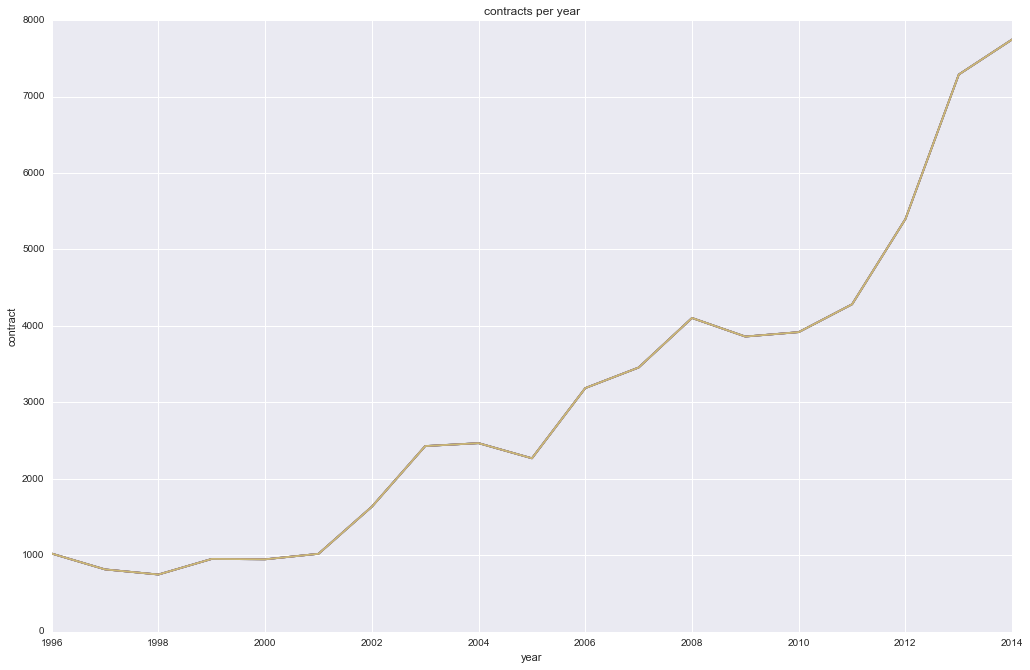

In [19]:
contract_data=living_data[living_data.index.year>1995].groupby(living_data[living_data.index.year>1995].index.year).count()

plt.plot(contract_data)

plt.xlabel('year')
plt.ylabel('contract')
plt.title('contracts per year')
plt.legend()
plt.tight_layout()

The line chart shows that the number of contracts increased gently from 1996 to 2008, after which experienced a wave till 2012. Then it rised dramatically to 8000 contracts per year on 2014.

We can see the composition of different features by giving some bar charts.

Create a function to remove the first three chars:

In [20]:
def remove_first_three_chars(x):
    if x[1]=='.':
        return x.replace(x[:3], '')
    else:
        return x

Create a function to remove the special keywords:

In [21]:
def remove_dollar(x):
    return x.replace('$','').replace('+','').replace('\'','')

In [22]:
living_data=living_data.applymap(remove_first_three_chars)
living_data=living_data.applymap(remove_dollar)

In [23]:
living_data

,CAR count,HMOWN,HMVALUE,PEOPLE,supermarket spend in a week
CONTRACT_START_DATE,,,,,
2014-04-08 00:00:00,3 Cars,Own with a mortgage,200k to 400k,5 People,200 to 300
1992-07-11 00:00:00,1 Car,Own with a mortgage,400k to 600k,4 People,300 to 400
2012-02-01 00:00:00,1 Car,Own without a mortgage,200k to 400k,Two People,100 to 200
2005-11-14 00:09:43,1 Car,Own without a mortgage,200k to 400k,One Person,100 to 200
1998-02-27 00:00:00,1 Car,Own with a mortgage,200k to 400k,Two People,100 to 200
2014-07-11 00:00:00,1 Car,Rent,Dont know,4 People,100 to 200
2005-05-06 00:14:37,No Answer,No Answer,No Answer,No Answer,No Answer
2013-12-06 00:00:00,0 Cars,Rent,800k to 1m,7 People,Up to 100
2008-04-18 00:00:00,1 Car,Rent,No Answer,Two People,Up to 100


Create a function to plot a bar chart.

In [24]:
%matplotlib inline
def compare_group(df,i):
    group_by=df.ix[:,i]
    plt.figure(num=i,  dpi=80, facecolor='w', edgecolor='k')
    _i=df.ix[:,i].groupby(group_by).count().plot(kind='bar')

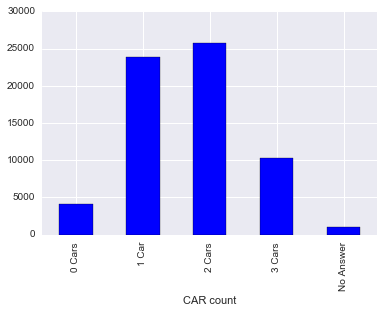

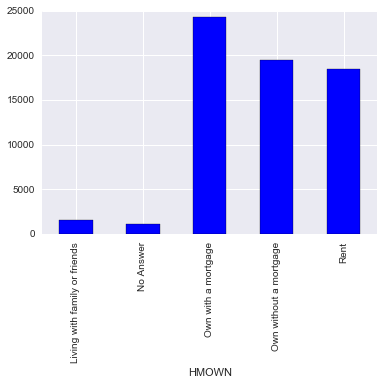

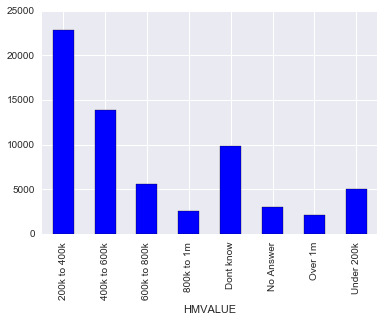

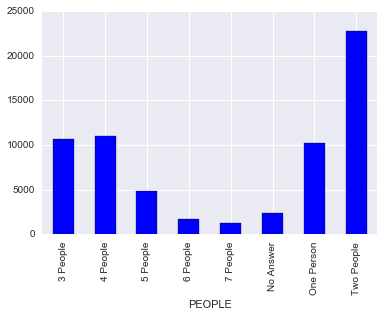

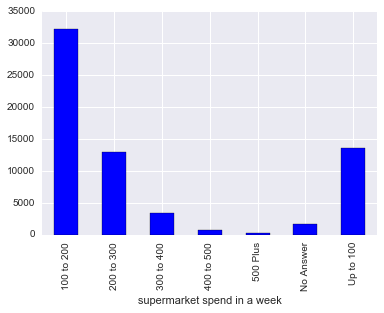

In [25]:
for i in living_data.columns:
    compare_group(living_data,i)

The first graph shows that most people own at least 1 car. The second and third one tell us that about 2/3 of the individuals own their home, half of them have mortgage. Besides, about 1/3 people rent houses. The values of their home are mainly from 200k to 400k NZD. The forth graph shows that usually 2 people live together. The last graph shows that most people spend 100 to 200 NZD a week in supermaret.